# Project
## Objective: Determine if a person is wearing glasses or not


### importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import random
import cv2

import plotly.graph_objects as go
import plotly.subplots as sp

### Below code to make sure memory growth is same across GPUs

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

### loads images from a specified folder and returns a list containing the loaded images as NumPy arrays.

In [4]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

### read the images

In [5]:
glasses = load_images_from_folder("Images/Images/glasses/")
no_glasses = load_images_from_folder("Images/Images/no_glasses/")

### plot the images with Glasses

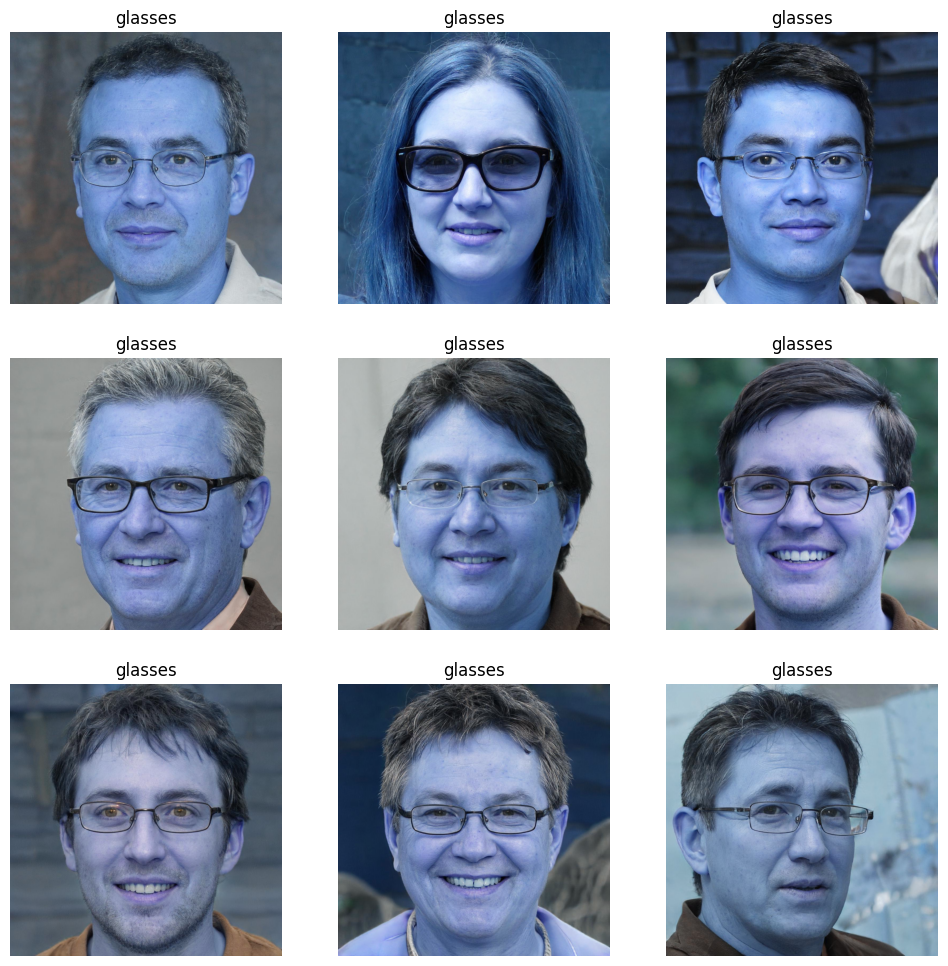

In [6]:
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(glasses))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow((glasses[ran_num[i]]))
    plt.title("glasses")
    plt.axis("off")

### plot the images with No Glasses

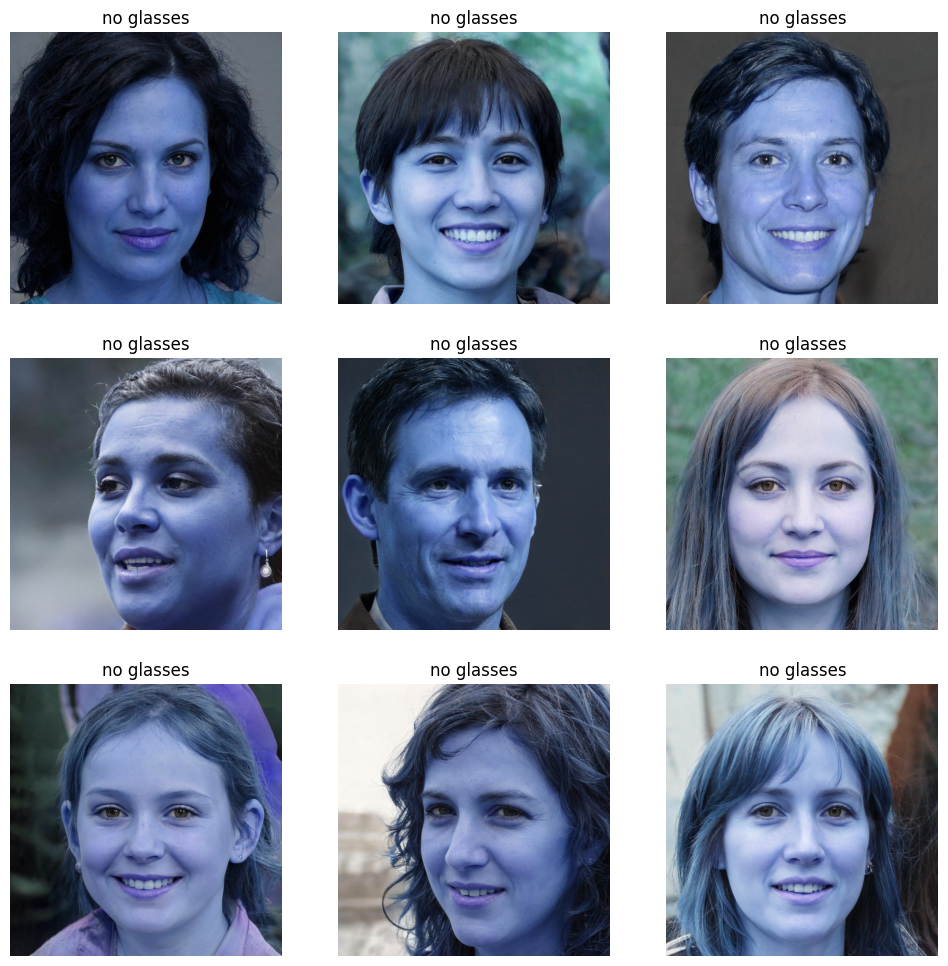

In [7]:
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(no_glasses))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow((no_glasses[ran_num[i]]))
    plt.title("no glasses")
    plt.axis("off")

### lets check the wether the data is balanced or imbalanced

In [8]:
print("Glasses: " + str(len(glasses)) + "\nNo glasses: " + str(len(no_glasses)) )

Glasses: 2769
No glasses: 2151


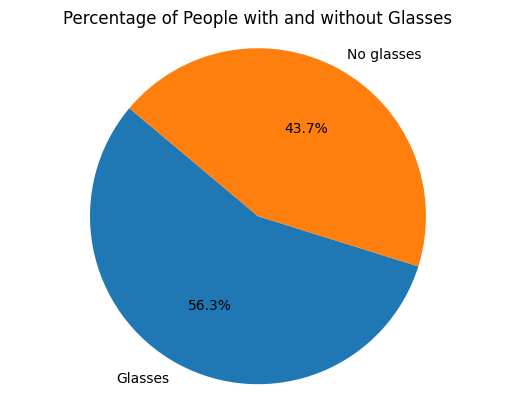

In [9]:
# Calculate the lengths of the 'glasses' and 'no_glasses' lists
num_glasses = len(glasses)
num_no_glasses = len(no_glasses)

# Data for plotting
categories = ['Glasses', 'No glasses']
values = [num_glasses, num_no_glasses]

# Create a pie chart
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Percentage of People with and without Glasses')

# Equal aspect ratio ensures that the pie chart is circular.
plt.axis('equal')

# Show the plot
plt.show()

#### The length of the different groups:-Glasses: 2769 -No glasses: 2151 . It seems we have some imbalance in our dataset, we have a more number of data with glasses then the data without glasses.

### preprocessing the data for classification model

In [10]:
# we use random seed to be sure that everytime random seed is called, it uses same all along
tf.random.set_seed(123456)

BATCH_SIZE = 32    # the model will process 32 images in each pass
IMG_SIZE = (160, 160) # images will be resized to have a width and height of 160 pixels

all_images= glasses + no_glasses

data = "Images/Images/"